In [1]:
from detectron2.config import LazyConfig, instantiate
from detectron2.checkpoint import DetectionCheckpointer
from demo.demo import VisualizationDemo, get_parser
import numpy as np
from detectron2.data.detection_utils import read_image
import matplotlib.pyplot as plt
import cv2
import os
config_file = 'projects/dino/configs/odor3_fn_l_lrf_384_fl4_5scale_50ep.py'
ckpt_pth = '/hdd/models/dino-focal/focaldino_ep18.pth'

try:
    cfg = LazyConfig.load(config_file)
except AssertionError as e:
    if str(e).startswith('Dataset '):
        pass
    else:
        raise e
model = instantiate(cfg.model)
model.to(cfg.train.device)
checkpointer = DetectionCheckpointer(model)
checkpointer.load(ckpt_pth)
model.eval()
demo = VisualizationDemo(
    model=model,
    min_size_test=800,
    max_size_test=1333,
    img_format='RGB',
    metadata_dataset='odor_test')

def treat_grayscale(img):
    if len(img.shape) == 2:
        return np.stack((img,)*3, axis=-1)
    else:
        return img

(4918, 6000, 3)
(4918, 6000, 3)


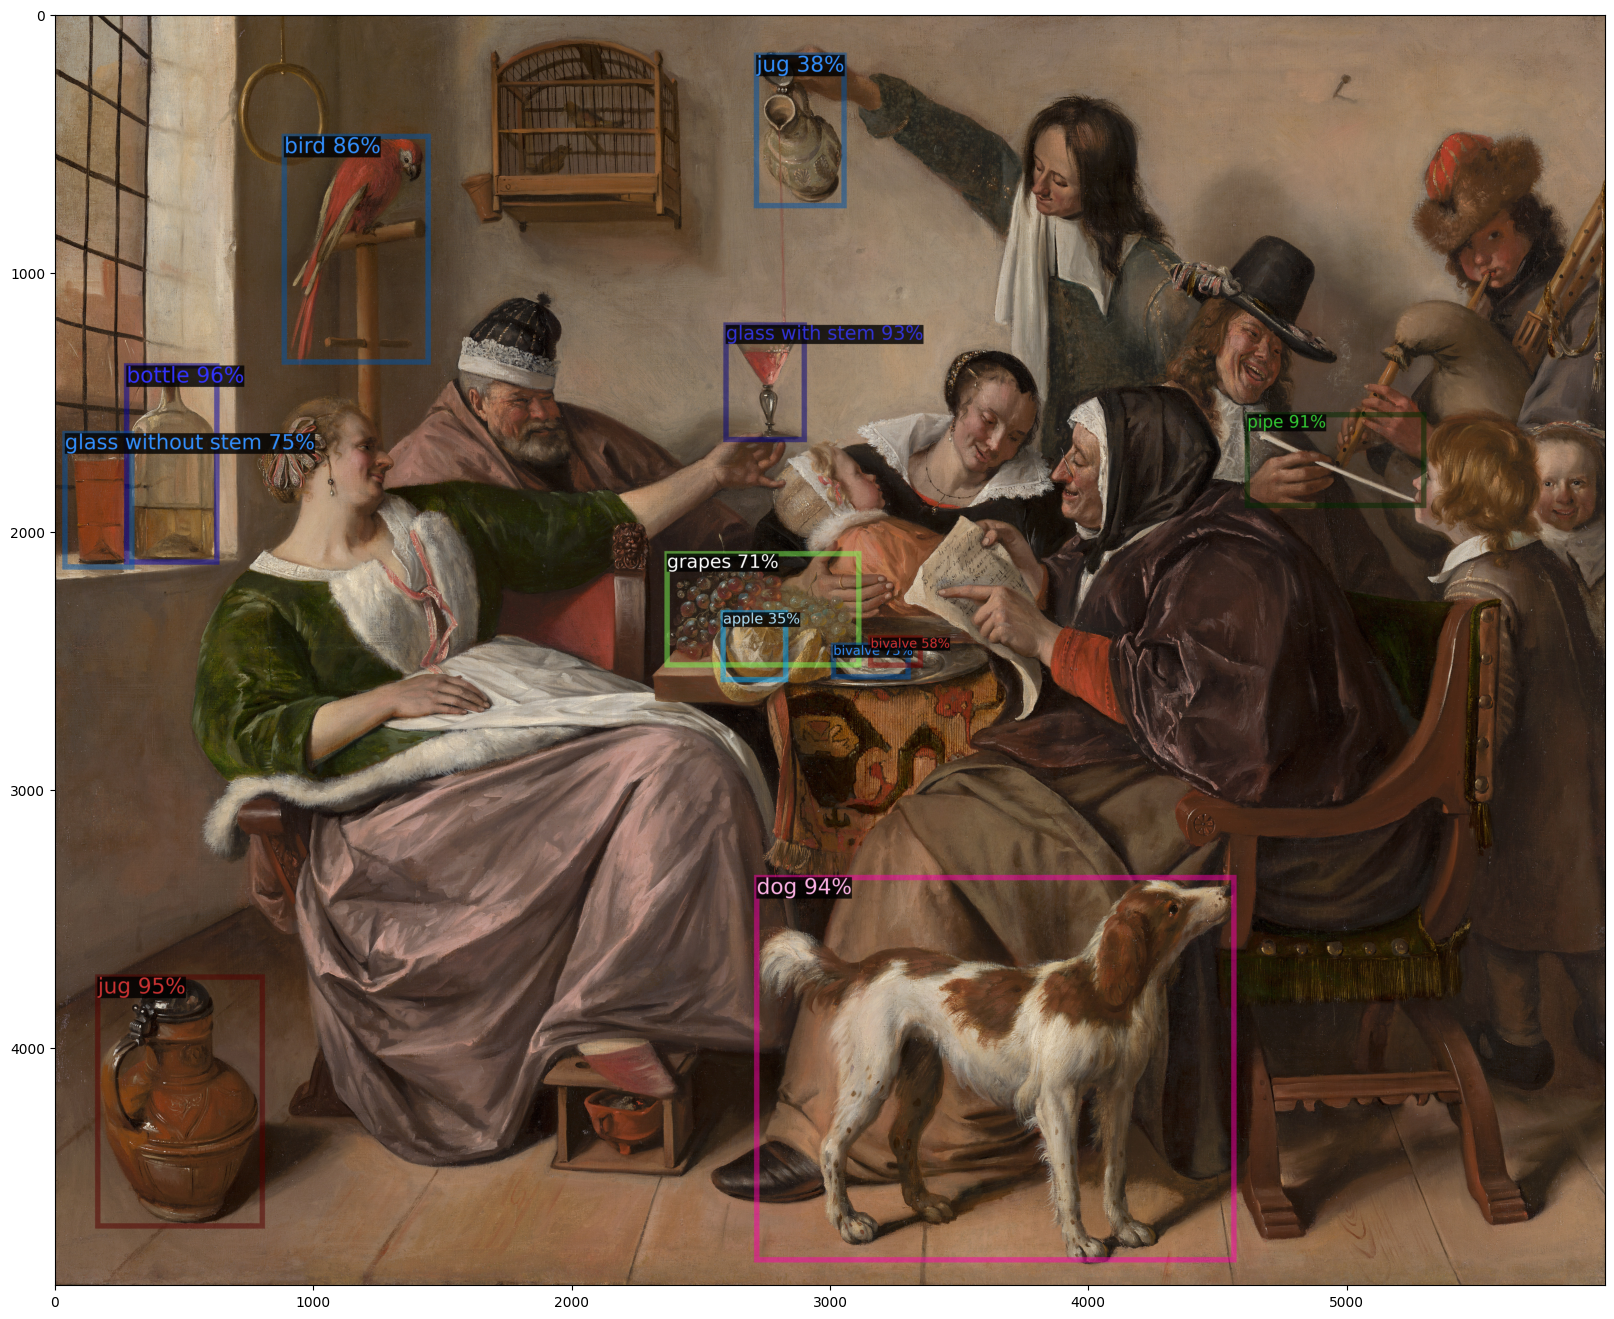

In [4]:
#link = 'https://upload.wikimedia.org/wikipedia/commons/6/62/Gaspar_Peeter_Verbruggen_d.%C3%86._-_Blomsterkrans_med_Johannes_D%C3%B8beren_-_KMSsp332_-_Statens_Museum_for_Kunst.jpg'
# link = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Josefa_d%27ayala_%28detta_di_%C3%B3bidos%29%2C_natura_morta_con_cocomero_e_pere%2C_1670_ca.jpg/800px-Josefa_d%27ayala_%28detta_di_%C3%B3bidos%29%2C_natura_morta_con_cocomero_e_pere%2C_1670_ca.jpg'
# link = 'https://puam-loris.aws.princeton.edu/loris/INV33883.jp2/full/full/0/default.jpg'
# link = 'https://recherche.smb.museum/images/4288729_4000x4000.jpg'
link = 'https://www.mauritshuis.nl/media/olffilpk/0742_repro.jpg'


img = read_image(link)
print(img.shape)
img = treat_grayscale(img)
print(img.shape)
predictions, visualized_output = demo.run_on_image(img, 0.3)
plt.figure(figsize=(20,20))
plt.imshow(visualized_output.get_image()[:,:,::-1])

In [7]:
predictions

{'instances': Instances(num_instances=3, image_height=1700, image_width=2597, fields=[pred_boxes: Boxes(tensor([[1041.5148,  747.3311, 1402.8094, 1262.4832],
         [1629.9318, 1157.5076, 1775.7838, 1298.3783],
         [1947.1714, 1273.8738, 2181.4084, 1513.0199]], device='cuda:0')), scores: tensor([0.9623, 0.9475, 0.9469], device='cuda:0'), pred_classes: tensor([ 33, 118, 137], device='cuda:0')])}

In [8]:
def to_coco(dt2_output):
    imgs = []
    annotations = []

    for img, preds in dt2_output:
        imgs.append({
            'id': img['id'],
            'file_name': img['file_name'],
            'height': img['height'],
            'width': img['width']
        })
        boxes = preds.get('pred_boxes')
        scores = preds.get('scores')
        classes = preds.get('pred_classes')

        for box, score, cls in zip(boxes, scores, classes):
            ann_id = len(annotations)
            box = box.cpu().numpy()
            box = BoxMode.convert(np.array([box]), BoxMode.XYXY_ABS, BoxMode.XYWH_ABS)
            annotations.append(
                {
                    'id': ann_id,
                    'img_id': img['id'],
                    'category_id': int(cls.cpu().item()),
                    'bbox': list(map(int, box[0])),
                    'score': float(score.cpu().item())
                }
            )

    return {
        'images': imgs,
        'annotations': annotations
    }

In [17]:
ja = img,predictions['instances']

In [20]:
preds

NameError: name 'preds' is not defined

In [18]:
to_coco(ja)

ValueError: too many values to unpack (expected 2)